<a href="https://colab.research.google.com/github/anilans029/computer_vision/blob/main/POC_for_conv_and_pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import Conv2D

In [3]:
os.listdir()

['.config', 'drive', 'sample_data']

In [4]:
os.chdir("/content/drive/MyDrive/Colab Notebooks")
os.listdir()

['coloumn_transformer.ipynb',
 'insrance_premium_prediction (1).ipynb',
 'insrance_premium_prediction.ipynb',
 'car_img.jpg',
 'car_gray_scale.jpeg',
 'Image_understanding_cv2_functions.ipynb',
 'remote_ssh.ipynb',
 'POC for conv and pooling.ipynb']

In [141]:
def read_img(path, grayscale = True):
    
  car_img = cv2.imread(path)
  if grayscale== True:
    car_img = cv2.cvtColor(car_img, cv2.COLOR_BGR2GRAY)
    plt.imshow(car_img,cmap = "gray")
    plt.show()
  else:
    cv2_imshow(car_img,)
  return car_img

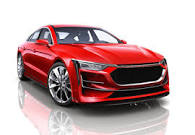

In [142]:

car_img = read_img("car_img.jpg", grayscale = False)

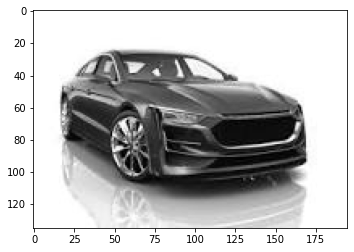

In [127]:
car_gray = read_img("car_img.jpg", grayscale = True)

In [22]:
car_img.shape

(135, 195, 3)

In [26]:
row, col,channels = car_img.shape
car_img = car_img.reshape(1,row,col,3)
car_img.shape

(1, 135, 195, 3)

In [55]:
conv_layer = [Conv2D(filters = 1,
                    kernel_size = (3,3),
                    strides = (1,1),
                    input_shape= car_img.shape[1:])]
conv_model = tf.keras.Sequential(conv_layer)
conv_model.summary()


### here since ther are 3 channels and kernel gets applied on each channel so no.of trainable 
### params for kernels = 3* 9 = 27 + 1bias = 28 params

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 133, 193, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [60]:
out = conv_model.predict(car_img)


In [61]:
out.shape

(1, 133, 193, 1)

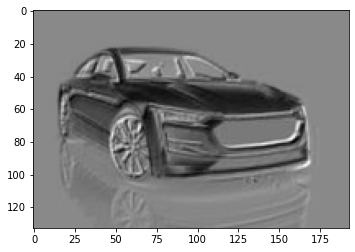

In [62]:
row, col,channels = out.shape[1:]
out = out.reshape(row, col)
plt.imshow(out, cmap= "gray")


### **To display output feature maps for 5 filters**

In [115]:
def reshape_img(img , grayscale):
  if not grayscale:
    rows, col, channel = img.shape
    car_img = img.reshape(1,rows, col, channel)
  else:
    row,col = car_img.shape
    car_img  = img.reshape(1,row,col)
  return car_img

def get_conv_model(filters = 5,kernel_size = (3,3),input_shape =None, strides = (1,1), padding = "valid"):
  layers = [Conv2D(filters = filters, kernel_size = kernel_size, strides = strides, padding= padding ,input_shape = input_shape)]
  model = tf.keras.Sequential(layers)
  print(model.summary())
  return model

def apply_conv_model_visualize(img, conv_model):
  out = conv_model.predict(img)
  row, col, depth = out.shape[1:]
  reshape_out = out.reshape(row, col, depth)
  for d in range(depth):
    plt.imshow(reshape_out[:,:,d],cmap= "gray")
    plt.show()

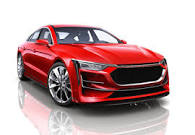

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 133, 193, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
None


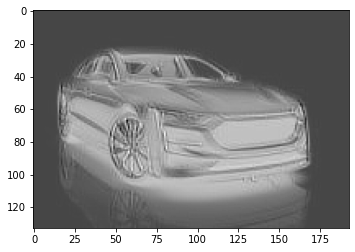

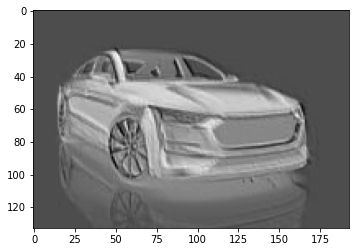

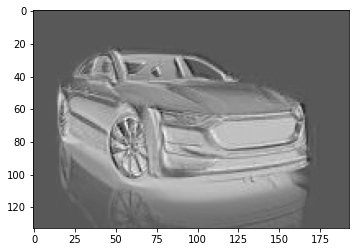

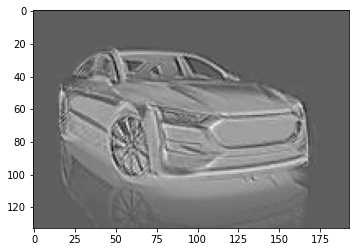

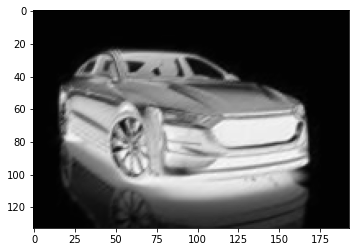

In [143]:
img = read_img(path = "car_img.jpg", grayscale=False)
reshaped_img = reshape_img(img=img, grayscale=False)
model = get_conv_model(filters = 5,kernel_size = (3,3),input_shape =reshaped_img.shape[1:])
apply_conv_model_visualize(reshaped_img, model)